# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


In [447]:
m = 3
A = 0.1#0.0492646484375#0.001#0.049375#5#0.0492645084166179#0.049264507293701174#0.049264508247375494#0.04925#0.0493#0.001#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [448]:
global loggrid=true#true
global bisection=false
global meshrefinement=false;

In [449]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0#2.0^m*1600.0/2.0#2.0^m*1000.0/2.0#Nt=2.0^m*1000.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*200.0/2.0#2.0^m*1600.0/2.0#2.0^m*1000.0/2.0#Nt=2.0^m*1000.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [450]:
print(N)

800.0

In [451]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.00125
dt =0.000125
dx/dt =10.0


In [452]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA" #~/data/ritapsantos/
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [453]:
using Printf
include("./ScalarField.jl");

In [454]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    """global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-4]=xtilde[1:length(xtilde)-1]"""
end;

step size is  0.00125
the time step is 0.000125


In [455]:
Narray=zeros(length(initX1))
for i in 1:length(initX1)-1
    Narray[i+1]=Narray[i]+1
end

#x=originalX[4:L-3]
#y=Narray

In [456]:
"""using Plots
plot([initX1,x],[Narray,y],xlim=[0,0.008],ylim=[0,400],label=["N=1000 uneven grid" "N=7500 even grid"],ylabel="Number of points",xlabel="x")
""";

# Initial data of m β Ψ and Ψ,x

In [457]:
using Dierckx
using Quadmath


####
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)
initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [458]:
y0=[0 0 0]

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

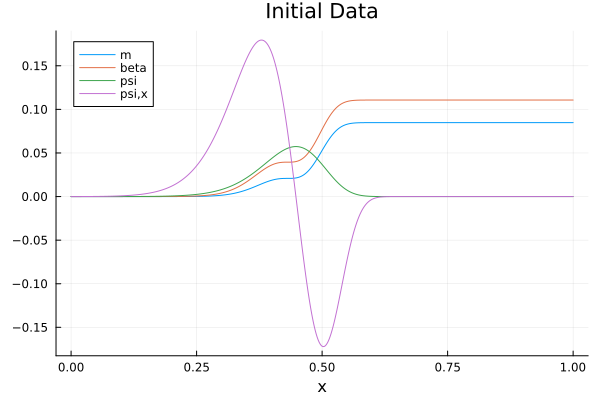

In [459]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [460]:
using CSV, Tables, Printf
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [461]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [462]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.03084271193370367


In [463]:
using Base.Threads
Threads.nthreads()

4

In [464]:
dt=5e-5/2/2/2#/2/2
#dt=5e-5/2/2/2*2*2

6.25e-6

 ## Time evolution

fixed grid

In [ ]:
finaltime=2.0#1.3#2.0#1.3#1.6#2#1.3#0.08*2#0.005*10*5#1#0.9#0.8#0.04*5*4#length(T)-1
evol_stats, T_interp = timeevolution(state_array,finaltime,run);#timeevolution(state_array,finaltime,dir*"/res$res",run,auxstate_array);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);



iteration 20 dt is 6.25e-6, t=0.00012500000000000003 speed is 0.49999614469816706, dx/dt=200.0


iteration 40 dt is 6.25e-6, t=0.00024999999999999984 speed is 0.49999614469816706, dx/dt=200.0


iteration 60 dt is 6.25e-6, t=0.00037500000000000017 speed is 0.49999614469816706, dx/dt=200.0


iteration 80 dt is 6.25e-6, t=0.0005000000000000004 speed is 0.49999614469816706, dx/dt=200.0


iteration 100 dt is 6.25e-6, t=0.0006249999999999997 speed is 0.49999614469816706, dx/dt=200.0


iteration 120 dt is 6.25e-6, t=0.0007499999999999989 speed is 0.49999614469816706, dx/dt=200.0


iteration 140 dt is 6.25e-6, t=0.0008749999999999982 speed is 0.49999614469816706, dx/dt=200.0


iteration 160 dt is 6.25e-6, t=0.0009999999999999974 speed is 0.49999614469816706, dx/dt=200.0


iteration 180 dt is 6.25e-6, t=0.0011249999999999967 speed is 0.49999614469816706, dx/dt=200.0


iteration 200 dt is 6.25e-6, t=0.001249999999999996 speed is 0.49999614469816706, dx/dt=200.0


iteration 220 dt is 6.25e-6, t



iteration 1720 dt is 6.25e-6, t=0.010749999999999836 speed is 0.49999614469816706, dx/dt=200.0


iteration 1740 dt is 6.25e-6, t=0.010874999999999822 speed is 0.49999614469816706, dx/dt=200.0


iteration 1760 dt is 6.25e-6, t=0.010999999999999809 speed is 0.49999614469816706, dx/dt=200.0


iteration 1780 dt is 6.25e-6, t=0.011124999999999795 speed is 0.49999614469816706, dx/dt=200.0


iteration 1800 dt is 6.25e-6, t=0.011249999999999781 speed is 0.49999614469816706, dx/dt=200.0


iteration 1820 dt is 6.25e-6, t=0.011374999999999767 speed is 0.49999614469816706, dx/dt=200.0


iteration 1840 dt is 6.25e-6, t=0.011499999999999753 speed is 0.49999614469816706, dx/dt=200.0


iteration 1860 dt is 6.25e-6, t=0.01162499999999974 speed is 0.49999614469816706, dx/dt=200.0


iteration 1880 dt is 6.25e-6, t=0.011749999999999726 speed is 0.49999614469816706, dx/dt=200.0


iteration 1900 dt is 6.25e-6, t=0.011874999999999712 speed is 0.49999614469816706, dx/dt=200.0


iteration 1920 dt is 6.25e-6,



iteration 3420 dt is 6.25e-6, t=0.021374999999998666 speed is 0.49999614469816706, dx/dt=200.0


iteration 3440 dt is 6.25e-6, t=0.021499999999998652 speed is 0.49999614469816706, dx/dt=200.0


iteration 3460 dt is 6.25e-6, t=0.02162499999999864 speed is 0.49999614469816706, dx/dt=200.0


iteration 3480 dt is 6.25e-6, t=0.021749999999998625 speed is 0.49999614469816706, dx/dt=200.0


iteration 3500 dt is 6.25e-6, t=0.02187499999999861 speed is 0.49999614469816706, dx/dt=200.0


iteration 3520 dt is 6.25e-6, t=0.021999999999998597 speed is 0.49999614469816706, dx/dt=200.0


iteration 3540 dt is 6.25e-6, t=0.022124999999998583 speed is 0.49999614469816706, dx/dt=200.0


iteration 3560 dt is 6.25e-6, t=0.02224999999999857 speed is 0.49999614469816706, dx/dt=200.0


iteration 3580 dt is 6.25e-6, t=0.022374999999998556 speed is 0.49999614469816706, dx/dt=200.0


iteration 3600 dt is 6.25e-6, t=0.022499999999998542 speed is 0.49999614469816706, dx/dt=200.0


iteration 3620 dt is 6.25e-6, t



iteration 5120 dt is 6.25e-6, t=0.031999999999997496 speed is 0.49999614469816717, dx/dt=200.0


iteration 5140 dt is 6.25e-6, t=0.03212499999999748 speed is 0.49999614469816717, dx/dt=200.0


iteration 5160 dt is 6.25e-6, t=0.03224999999999747 speed is 0.49999614469816717, dx/dt=200.0


iteration 5180 dt is 6.25e-6, t=0.032374999999997454 speed is 0.49999614469816717, dx/dt=200.0


iteration 5200 dt is 6.25e-6, t=0.03249999999999744 speed is 0.49999614469816717, dx/dt=200.0


iteration 5220 dt is 6.25e-6, t=0.03262499999999743 speed is 0.49999614469816717, dx/dt=200.0


iteration 5240 dt is 6.25e-6, t=0.03274999999999741 speed is 0.49999614469816717, dx/dt=200.0


iteration 5260 dt is 6.25e-6, t=0.0328749999999974 speed is 0.49999614469816717, dx/dt=200.0


iteration 5280 dt is 6.25e-6, t=0.032999999999997386 speed is 0.49999614469816717, dx/dt=200.0


iteration 5300 dt is 6.25e-6, t=0.03312499999999737 speed is 0.49999614469816717, dx/dt=200.0


iteration 5320 dt is 6.25e-6, t=0.03



iteration 6840 dt is 6.25e-6, t=0.04274999999999631 speed is 0.49999614469816706, dx/dt=200.0


iteration 6860 dt is 6.25e-6, t=0.0428749999999963 speed is 0.49999614469816706, dx/dt=200.0


iteration 6880 dt is 6.25e-6, t=0.042999999999996284 speed is 0.49999614469816706, dx/dt=200.0


iteration 6900 dt is 6.25e-6, t=0.04312499999999627 speed is 0.49999614469816706, dx/dt=200.0


iteration 6920 dt is 6.25e-6, t=0.04324999999999626 speed is 0.49999614469816706, dx/dt=200.0


iteration 6940 dt is 6.25e-6, t=0.04337499999999624 speed is 0.49999614469816706, dx/dt=200.0


iteration 6960 dt is 6.25e-6, t=0.04349999999999623 speed is 0.49999614469816706, dx/dt=200.0


iteration 6980 dt is 6.25e-6, t=0.043624999999996215 speed is 0.49999614469816706, dx/dt=200.0


iteration 7000 dt is 6.25e-6, t=0.0437499999999962 speed is 0.49999614469816706, dx/dt=200.0


iteration 7020 dt is 6.25e-6, t=0.04387499999999619 speed is 0.49999614469816706, dx/dt=200.0


iteration 7040 dt is 6.25e-6, t=0.0439



iteration 8560 dt is 6.25e-6, t=0.05349999999999513 speed is 0.49999614469816706, dx/dt=200.0


iteration 8580 dt is 6.25e-6, t=0.053624999999995114 speed is 0.49999614469816706, dx/dt=200.0


iteration 8600 dt is 6.25e-6, t=0.0537499999999951 speed is 0.49999614469816706, dx/dt=200.0


iteration 8620 dt is 6.25e-6, t=0.05387499999999509 speed is 0.49999614469816706, dx/dt=200.0


iteration 8640 dt is 6.25e-6, t=0.05399999999999507 speed is 0.49999614469816706, dx/dt=200.0


iteration 8660 dt is 6.25e-6, t=0.05412499999999506 speed is 0.49999614469816706, dx/dt=200.0


iteration 8680 dt is 6.25e-6, t=0.054249999999995045 speed is 0.49999614469816706, dx/dt=200.0


iteration 8700 dt is 6.25e-6, t=0.05437499999999503 speed is 0.49999614469816706, dx/dt=200.0


iteration 8720 dt is 6.25e-6, t=0.05449999999999502 speed is 0.49999614469816706, dx/dt=200.0


iteration 8740 dt is 6.25e-6, t=0.054624999999995004 speed is 0.49999614469816706, dx/dt=200.0


iteration 8760 dt is 6.25e-6, t=0.05



iteration 10280 dt is 6.25e-6, t=0.06424999999999395 speed is 0.49999614469816717, dx/dt=200.0


iteration 10300 dt is 6.25e-6, t=0.06437499999999394 speed is 0.49999614469816717, dx/dt=200.0


iteration 10320 dt is 6.25e-6, t=0.06449999999999392 speed is 0.49999614469816717, dx/dt=200.0


iteration 10340 dt is 6.25e-6, t=0.06462499999999391 speed is 0.49999614469816717, dx/dt=200.0


iteration 10360 dt is 6.25e-6, t=0.0647499999999939 speed is 0.49999614469816717, dx/dt=200.0


iteration 10380 dt is 6.25e-6, t=0.06487499999999388 speed is 0.49999614469816717, dx/dt=200.0


iteration 10400 dt is 6.25e-6, t=0.06499999999999387 speed is 0.49999614469816717, dx/dt=200.0


iteration 10420 dt is 6.25e-6, t=0.06512499999999385 speed is 0.49999614469816717, dx/dt=200.0


iteration 10440 dt is 6.25e-6, t=0.06524999999999384 speed is 0.49999614469816717, dx/dt=200.0


iteration 10460 dt is 6.25e-6, t=0.06537499999999383 speed is 0.49999614469816717, dx/dt=200.0


iteration 10480 dt is 6.25e-6



iteration 11980 dt is 6.25e-6, t=0.07487499999999278 speed is 0.49999614469816717, dx/dt=200.0


iteration 12000 dt is 6.25e-6, t=0.07499999999999277 speed is 0.49999614469816717, dx/dt=200.0


iteration 12020 dt is 6.25e-6, t=0.07512499999999275 speed is 0.49999614469816717, dx/dt=200.0


iteration 12040 dt is 6.25e-6, t=0.07524999999999274 speed is 0.49999614469816717, dx/dt=200.0


iteration 12060 dt is 6.25e-6, t=0.07537499999999273 speed is 0.49999614469816717, dx/dt=200.0


iteration 12080 dt is 6.25e-6, t=0.07549999999999271 speed is 0.49999614469816717, dx/dt=200.0


iteration 12100 dt is 6.25e-6, t=0.0756249999999927 speed is 0.49999614469816717, dx/dt=200.0


iteration 12120 dt is 6.25e-6, t=0.07574999999999268 speed is 0.49999614469816717, dx/dt=200.0


iteration 12140 dt is 6.25e-6, t=0.07587499999999267 speed is 0.49999614469816717, dx/dt=200.0


iteration 12160 dt is 6.25e-6, t=0.07599999999999266 speed is 0.49999614469816717, dx/dt=200.0


iteration 12180 dt is 6.25e-6



iteration 13680 dt is 6.25e-6, t=0.08549999999999161 speed is 0.4999961446981672, dx/dt=200.0


iteration 13700 dt is 6.25e-6, t=0.0856249999999916 speed is 0.4999961446981672, dx/dt=200.0


iteration 13720 dt is 6.25e-6, t=0.08574999999999158 speed is 0.4999961446981672, dx/dt=200.0


iteration 13740 dt is 6.25e-6, t=0.08587499999999157 speed is 0.4999961446981672, dx/dt=200.0


iteration 13760 dt is 6.25e-6, t=0.08599999999999156 speed is 0.49999614469816717, dx/dt=200.0


iteration 13780 dt is 6.25e-6, t=0.08612499999999154 speed is 0.49999614469816717, dx/dt=200.0


iteration 13800 dt is 6.25e-6, t=0.08624999999999153 speed is 0.49999614469816717, dx/dt=200.0


iteration 13820 dt is 6.25e-6, t=0.08637499999999151 speed is 0.49999614469816717, dx/dt=200.0


iteration 13840 dt is 6.25e-6, t=0.0864999999999915 speed is 0.49999614469816717, dx/dt=200.0


iteration 13860 dt is 6.25e-6, t=0.08662499999999149 speed is 0.49999614469816717, dx/dt=200.0


iteration 13880 dt is 6.25e-6, t=0



iteration 15400 dt is 6.25e-6, t=0.09624999999999043 speed is 0.4999961446981672, dx/dt=200.0


iteration 15420 dt is 6.25e-6, t=0.09637499999999041 speed is 0.4999961446981672, dx/dt=200.0


iteration 15440 dt is 6.25e-6, t=0.0964999999999904 speed is 0.4999961446981672, dx/dt=200.0


iteration 15460 dt is 6.25e-6, t=0.09662499999999039 speed is 0.4999961446981672, dx/dt=200.0


iteration 15480 dt is 6.25e-6, t=0.09674999999999037 speed is 0.4999961446981672, dx/dt=200.0


iteration 15500 dt is 6.25e-6, t=0.09687499999999036 speed is 0.4999961446981672, dx/dt=200.0


iteration 15520 dt is 6.25e-6, t=0.09699999999999034 speed is 0.4999961446981672, dx/dt=200.0


iteration 15540 dt is 6.25e-6, t=0.09712499999999033 speed is 0.4999961446981672, dx/dt=200.0


iteration 15560 dt is 6.25e-6, t=0.09724999999999032 speed is 0.4999961446981672, dx/dt=200.0


iteration 15580 dt is 6.25e-6, t=0.0973749999999903 speed is 0.4999961446981672, dx/dt=200.0


iteration 15600 dt is 6.25e-6, t=0.09749



iteration 17100 dt is 6.25e-6, t=0.10687499999998926 speed is 0.49999614469816733, dx/dt=200.0


iteration 17120 dt is 6.25e-6, t=0.10699999999998924 speed is 0.49999614469816733, dx/dt=200.0


iteration 17140 dt is 6.25e-6, t=0.10712499999998923 speed is 0.49999614469816733, dx/dt=200.0


iteration 17160 dt is 6.25e-6, t=0.10724999999998922 speed is 0.49999614469816733, dx/dt=200.0


iteration 17180 dt is 6.25e-6, t=0.1073749999999892 speed is 0.49999614469816733, dx/dt=200.0


iteration 17200 dt is 6.25e-6, t=0.10749999999998919 speed is 0.49999614469816733, dx/dt=200.0


iteration 17220 dt is 6.25e-6, t=0.10762499999998917 speed is 0.49999614469816733, dx/dt=200.0


iteration 17240 dt is 6.25e-6, t=0.10774999999998916 speed is 0.49999614469816733, dx/dt=200.0


iteration 17260 dt is 6.25e-6, t=0.10787499999998915 speed is 0.49999614469816733, dx/dt=200.0


iteration 17280 dt is 6.25e-6, t=0.10799999999998913 speed is 0.49999614469816733, dx/dt=200.0


iteration 17300 dt is 6.25e-6



iteration 18800 dt is 6.25e-6, t=0.11749999999998809 speed is 0.49999614469816744, dx/dt=200.0


iteration 18820 dt is 6.25e-6, t=0.11762499999998807 speed is 0.49999614469816744, dx/dt=200.0


iteration 18840 dt is 6.25e-6, t=0.11774999999998806 speed is 0.49999614469816744, dx/dt=200.0


iteration 18860 dt is 6.25e-6, t=0.11787499999998804 speed is 0.49999614469816756, dx/dt=200.0


iteration 18880 dt is 6.25e-6, t=0.11799999999998803 speed is 0.49999614469816756, dx/dt=200.0


iteration 18900 dt is 6.25e-6, t=0.11812499999998802 speed is 0.49999614469816756, dx/dt=200.0


iteration 18920 dt is 6.25e-6, t=0.118249999999988 speed is 0.49999614469816756, dx/dt=200.0


iteration 18940 dt is 6.25e-6, t=0.11837499999998799 speed is 0.49999614469816756, dx/dt=200.0


iteration 18960 dt is 6.25e-6, t=0.11849999999998798 speed is 0.49999614469816756, dx/dt=200.0


iteration 18980 dt is 6.25e-6, t=0.11862499999998796 speed is 0.49999614469816756, dx/dt=200.0


iteration 19000 dt is 6.25e-6,



iteration 20500 dt is 6.25e-6, t=0.12812499999999385 speed is 0.49999614469816767, dx/dt=200.0


iteration 20520 dt is 6.25e-6, t=0.12824999999999412 speed is 0.49999614469816767, dx/dt=200.0


iteration 20540 dt is 6.25e-6, t=0.12837499999999438 speed is 0.49999614469816767, dx/dt=200.0


iteration 20560 dt is 6.25e-6, t=0.12849999999999465 speed is 0.49999614469816767, dx/dt=200.0


iteration 20580 dt is 6.25e-6, t=0.1286249999999949 speed is 0.49999614469816767, dx/dt=200.0


iteration 20600 dt is 6.25e-6, t=0.12874999999999517 speed is 0.49999614469816767, dx/dt=200.0


iteration 20620 dt is 6.25e-6, t=0.12887499999999544 speed is 0.49999614469816767, dx/dt=200.0


iteration 20640 dt is 6.25e-6, t=0.1289999999999957 speed is 0.49999614469816767, dx/dt=200.0


iteration 20660 dt is 6.25e-6, t=0.12912499999999597 speed is 0.49999614469816767, dx/dt=200.0


iteration 20680 dt is 6.25e-6, t=0.12924999999999623 speed is 0.49999614469816767, dx/dt=200.0


iteration 20700 dt is 6.25e-6,



iteration 22220 dt is 6.25e-6, t=0.13887500000001654 speed is 0.499996144698168, dx/dt=200.0


iteration 22240 dt is 6.25e-6, t=0.1390000000000168 speed is 0.499996144698168, dx/dt=200.0


iteration 22260 dt is 6.25e-6, t=0.13912500000001707 speed is 0.499996144698168, dx/dt=200.0


iteration 22280 dt is 6.25e-6, t=0.13925000000001733 speed is 0.499996144698168, dx/dt=200.0


iteration 22300 dt is 6.25e-6, t=0.1393750000000176 speed is 0.499996144698168, dx/dt=200.0


iteration 22320 dt is 6.25e-6, t=0.13950000000001786 speed is 0.4999961446981679, dx/dt=200.0


iteration 22340 dt is 6.25e-6, t=0.13962500000001812 speed is 0.4999961446981679, dx/dt=200.0


iteration 22360 dt is 6.25e-6, t=0.1397500000000184 speed is 0.4999961446981679, dx/dt=200.0


iteration 22380 dt is 6.25e-6, t=0.13987500000001865 speed is 0.4999961446981679, dx/dt=200.0


iteration 22400 dt is 6.25e-6, t=0.14000000000001891 speed is 0.499996144698168, dx/dt=200.0


iteration 22420 dt is 6.25e-6, t=0.140125000000



iteration 23940 dt is 6.25e-6, t=0.14962500000003923 speed is 0.49999614469816833, dx/dt=200.0


iteration 23960 dt is 6.25e-6, t=0.1497500000000395 speed is 0.49999614469816833, dx/dt=200.0


iteration 23980 dt is 6.25e-6, t=0.14987500000003975 speed is 0.49999614469816833, dx/dt=200.0


iteration 24000 dt is 6.25e-6, t=0.15000000000004002 speed is 0.49999614469816833, dx/dt=200.0


iteration 24020 dt is 6.25e-6, t=0.15012500000004028 speed is 0.4999961446981682, dx/dt=200.0


iteration 24040 dt is 6.25e-6, t=0.15025000000004055 speed is 0.49999614469816833, dx/dt=200.0


iteration 24060 dt is 6.25e-6, t=0.1503750000000408 speed is 0.49999614469816833, dx/dt=200.0


iteration 24080 dt is 6.25e-6, t=0.15050000000004107 speed is 0.49999614469816833, dx/dt=200.0


iteration 24100 dt is 6.25e-6, t=0.15062500000004134 speed is 0.49999614469816833, dx/dt=200.0


iteration 24120 dt is 6.25e-6, t=0.1507500000000416 speed is 0.49999614469816833, dx/dt=200.0


iteration 24140 dt is 6.25e-6, t



iteration 25640 dt is 6.25e-6, t=0.16025000000006165 speed is 0.4999961446981688, dx/dt=200.0


iteration 25660 dt is 6.25e-6, t=0.1603750000000619 speed is 0.4999961446981688, dx/dt=200.0


iteration 25680 dt is 6.25e-6, t=0.16050000000006218 speed is 0.4999961446981688, dx/dt=200.0


iteration 25700 dt is 6.25e-6, t=0.16062500000006244 speed is 0.4999961446981688, dx/dt=200.0


iteration 25720 dt is 6.25e-6, t=0.1607500000000627 speed is 0.4999961446981688, dx/dt=200.0


iteration 25740 dt is 6.25e-6, t=0.16087500000006297 speed is 0.4999961446981689, dx/dt=200.0


iteration 25760 dt is 6.25e-6, t=0.16100000000006323 speed is 0.4999961446981689, dx/dt=200.0


iteration 25780 dt is 6.25e-6, t=0.1611250000000635 speed is 0.4999961446981689, dx/dt=200.0


iteration 25800 dt is 6.25e-6, t=0.16125000000006376 speed is 0.4999961446981688, dx/dt=200.0


iteration 25820 dt is 6.25e-6, t=0.16137500000006402 speed is 0.4999961446981688, dx/dt=200.0


iteration 25840 dt is 6.25e-6, t=0.161500



iteration 27360 dt is 6.25e-6, t=0.17100000000008433 speed is 0.49999614469816944, dx/dt=200.0


iteration 27380 dt is 6.25e-6, t=0.1711250000000846 speed is 0.49999614469816944, dx/dt=200.0


iteration 27400 dt is 6.25e-6, t=0.17125000000008486 speed is 0.49999614469816944, dx/dt=200.0


iteration 27420 dt is 6.25e-6, t=0.17137500000008513 speed is 0.49999614469816944, dx/dt=200.0


iteration 27440 dt is 6.25e-6, t=0.1715000000000854 speed is 0.49999614469816944, dx/dt=200.0


iteration 27460 dt is 6.25e-6, t=0.17162500000008565 speed is 0.49999614469816955, dx/dt=200.0


iteration 27480 dt is 6.25e-6, t=0.17175000000008592 speed is 0.49999614469816944, dx/dt=200.0


iteration 27500 dt is 6.25e-6, t=0.17187500000008618 speed is 0.49999614469816944, dx/dt=200.0


iteration 27520 dt is 6.25e-6, t=0.17200000000008644 speed is 0.49999614469816944, dx/dt=200.0


iteration 27540 dt is 6.25e-6, t=0.1721250000000867 speed is 0.49999614469816944, dx/dt=200.0


iteration 27560 dt is 6.25e-6, 



iteration 29080 dt is 6.25e-6, t=0.18175000000010702 speed is 0.4999961446981702, dx/dt=200.0


iteration 29100 dt is 6.25e-6, t=0.18187500000010728 speed is 0.49999614469817033, dx/dt=200.0


iteration 29120 dt is 6.25e-6, t=0.18200000000010755 speed is 0.49999614469817033, dx/dt=200.0


iteration 29140 dt is 6.25e-6, t=0.1821250000001078 speed is 0.49999614469817033, dx/dt=200.0


iteration 29160 dt is 6.25e-6, t=0.18225000000010808 speed is 0.49999614469817033, dx/dt=200.0


iteration 29180 dt is 6.25e-6, t=0.18237500000010834 speed is 0.49999614469817033, dx/dt=200.0


iteration 29200 dt is 6.25e-6, t=0.1825000000001086 speed is 0.49999614469817033, dx/dt=200.0


iteration 29220 dt is 6.25e-6, t=0.18262500000010887 speed is 0.49999614469817033, dx/dt=200.0


iteration 29240 dt is 6.25e-6, t=0.18275000000010913 speed is 0.49999614469817033, dx/dt=200.0


iteration 29260 dt is 6.25e-6, t=0.1828750000001094 speed is 0.49999614469817044, dx/dt=200.0


iteration 29280 dt is 6.25e-6, t



iteration 30800 dt is 6.25e-6, t=0.1925000000001297 speed is 0.49999614469817144, dx/dt=200.0


iteration 30820 dt is 6.25e-6, t=0.19262500000012997 speed is 0.49999614469817155, dx/dt=200.0


iteration 30840 dt is 6.25e-6, t=0.19275000000013023 speed is 0.49999614469817155, dx/dt=200.0


iteration 30860 dt is 6.25e-6, t=0.1928750000001305 speed is 0.49999614469817155, dx/dt=200.0


iteration 30880 dt is 6.25e-6, t=0.19300000000013076 speed is 0.49999614469817166, dx/dt=200.0


iteration 30900 dt is 6.25e-6, t=0.19312500000013103 speed is 0.49999614469817155, dx/dt=200.0


iteration 30920 dt is 6.25e-6, t=0.1932500000001313 speed is 0.49999614469817155, dx/dt=200.0


iteration 30940 dt is 6.25e-6, t=0.19337500000013155 speed is 0.49999614469817166, dx/dt=200.0


iteration 30960 dt is 6.25e-6, t=0.19350000000013182 speed is 0.49999614469817166, dx/dt=200.0


iteration 30980 dt is 6.25e-6, t=0.19362500000013208 speed is 0.4999961446981718, dx/dt=200.0


iteration 31000 dt is 6.25e-6, t



iteration 32520 dt is 6.25e-6, t=0.2032500000001524 speed is 0.49999614469817294, dx/dt=200.0


iteration 32540 dt is 6.25e-6, t=0.20337500000015266 speed is 0.49999614469817294, dx/dt=200.0


iteration 32560 dt is 6.25e-6, t=0.20350000000015292 speed is 0.49999614469817305, dx/dt=200.0


iteration 32580 dt is 6.25e-6, t=0.20362500000015318 speed is 0.49999614469817305, dx/dt=200.0


iteration 32600 dt is 6.25e-6, t=0.20375000000015345 speed is 0.49999614469817305, dx/dt=200.0


iteration 32620 dt is 6.25e-6, t=0.2038750000001537 speed is 0.49999614469817305, dx/dt=200.0


iteration 32640 dt is 6.25e-6, t=0.20400000000015397 speed is 0.49999614469817316, dx/dt=200.0


iteration 32660 dt is 6.25e-6, t=0.20412500000015424 speed is 0.49999614469817305, dx/dt=200.0


iteration 32680 dt is 6.25e-6, t=0.2042500000001545 speed is 0.49999614469817316, dx/dt=200.0


iteration 32700 dt is 6.25e-6, t=0.20437500000015477 speed is 0.49999614469817316, dx/dt=200.0


iteration 32720 dt is 6.25e-6, 



iteration 34240 dt is 6.25e-6, t=0.21400000000017508 speed is 0.49999614469817516, dx/dt=200.0


iteration 34260 dt is 6.25e-6, t=0.21412500000017534 speed is 0.49999614469817505, dx/dt=200.0


iteration 34280 dt is 6.25e-6, t=0.2142500000001756 speed is 0.49999614469817516, dx/dt=200.0


iteration 34300 dt is 6.25e-6, t=0.21437500000017587 speed is 0.49999614469817516, dx/dt=200.0


iteration 34320 dt is 6.25e-6, t=0.21450000000017613 speed is 0.49999614469817516, dx/dt=200.0


iteration 34340 dt is 6.25e-6, t=0.2146250000001764 speed is 0.49999614469817527, dx/dt=200.0


iteration 34360 dt is 6.25e-6, t=0.21475000000017666 speed is 0.49999614469817527, dx/dt=200.0


iteration 34380 dt is 6.25e-6, t=0.21487500000017692 speed is 0.49999614469817527, dx/dt=200.0


iteration 34400 dt is 6.25e-6, t=0.2150000000001772 speed is 0.49999614469817527, dx/dt=200.0


iteration 34420 dt is 6.25e-6, t=0.21512500000017745 speed is 0.49999614469817527, dx/dt=200.0


iteration 34440 dt is 6.25e-6, 



iteration 35960 dt is 6.25e-6, t=0.22475000000019776 speed is 0.49999614469817766, dx/dt=200.0


iteration 35980 dt is 6.25e-6, t=0.22487500000019803 speed is 0.49999614469817766, dx/dt=200.0


iteration 36000 dt is 6.25e-6, t=0.2250000000001983 speed is 0.49999614469817766, dx/dt=200.0


iteration 36020 dt is 6.25e-6, t=0.22512500000019856 speed is 0.49999614469817777, dx/dt=200.0


iteration 36040 dt is 6.25e-6, t=0.22525000000019882 speed is 0.49999614469817777, dx/dt=200.0


iteration 36060 dt is 6.25e-6, t=0.22537500000019908 speed is 0.4999961446981779, dx/dt=200.0


iteration 36080 dt is 6.25e-6, t=0.22550000000019935 speed is 0.49999614469817777, dx/dt=200.0


iteration 36100 dt is 6.25e-6, t=0.2256250000001996 speed is 0.4999961446981779, dx/dt=200.0


iteration 36120 dt is 6.25e-6, t=0.22575000000019987 speed is 0.4999961446981779, dx/dt=200.0


iteration 36140 dt is 6.25e-6, t=0.22587500000020014 speed is 0.499996144698178, dx/dt=200.0


iteration 36160 dt is 6.25e-6, t=0.



iteration 37680 dt is 6.25e-6, t=0.23550000000022045 speed is 0.4999961446981812, dx/dt=200.0


iteration 37700 dt is 6.25e-6, t=0.2356250000002207 speed is 0.4999961446981812, dx/dt=200.0


iteration 37720 dt is 6.25e-6, t=0.23575000000022098 speed is 0.4999961446981813, dx/dt=200.0


iteration 37740 dt is 6.25e-6, t=0.23587500000022124 speed is 0.4999961446981813, dx/dt=200.0


iteration 37760 dt is 6.25e-6, t=0.2360000000002215 speed is 0.4999961446981813, dx/dt=200.0


iteration 37780 dt is 6.25e-6, t=0.23612500000022177 speed is 0.49999614469818143, dx/dt=200.0


iteration 37800 dt is 6.25e-6, t=0.23625000000022203 speed is 0.49999614469818143, dx/dt=200.0


iteration 37820 dt is 6.25e-6, t=0.2363750000002223 speed is 0.49999614469818143, dx/dt=200.0


iteration 37840 dt is 6.25e-6, t=0.23650000000022256 speed is 0.49999614469818154, dx/dt=200.0


iteration 37860 dt is 6.25e-6, t=0.23662500000022282 speed is 0.49999614469818165, dx/dt=200.0


iteration 37880 dt is 6.25e-6, t=0.2



iteration 39400 dt is 6.25e-6, t=0.24625000000024314 speed is 0.4999961446981858, dx/dt=200.0


iteration 39420 dt is 6.25e-6, t=0.2463750000002434 speed is 0.4999961446981858, dx/dt=200.0


iteration 39440 dt is 6.25e-6, t=0.24650000000024366 speed is 0.4999961446981858, dx/dt=200.0


iteration 39460 dt is 6.25e-6, t=0.24662500000024393 speed is 0.49999614469818593, dx/dt=200.0


iteration 39480 dt is 6.25e-6, t=0.2467500000002442 speed is 0.49999614469818593, dx/dt=200.0


iteration 39500 dt is 6.25e-6, t=0.24687500000024445 speed is 0.49999614469818593, dx/dt=200.0


iteration 39520 dt is 6.25e-6, t=0.24700000000024472 speed is 0.49999614469818615, dx/dt=200.0


iteration 39540 dt is 6.25e-6, t=0.24712500000024498 speed is 0.49999614469818615, dx/dt=200.0


iteration 39560 dt is 6.25e-6, t=0.24725000000024525 speed is 0.49999614469818615, dx/dt=200.0


iteration 39580 dt is 6.25e-6, t=0.2473750000002455 speed is 0.49999614469818626, dx/dt=200.0


iteration 39600 dt is 6.25e-6, t=0



iteration 41120 dt is 6.25e-6, t=0.2570000000002347 speed is 0.49999614469819176, dx/dt=200.0


iteration 41140 dt is 6.25e-6, t=0.2571250000002344 speed is 0.49999614469819187, dx/dt=200.0


iteration 41160 dt is 6.25e-6, t=0.2572500000002341 speed is 0.49999614469819187, dx/dt=200.0


iteration 41180 dt is 6.25e-6, t=0.25737500000023383 speed is 0.499996144698192, dx/dt=200.0


iteration 41200 dt is 6.25e-6, t=0.25750000000023354 speed is 0.4999961446981921, dx/dt=200.0


iteration 41220 dt is 6.25e-6, t=0.25762500000023325 speed is 0.4999961446981921, dx/dt=200.0


iteration 41240 dt is 6.25e-6, t=0.25775000000023296 speed is 0.4999961446981921, dx/dt=200.0


iteration 41260 dt is 6.25e-6, t=0.25787500000023267 speed is 0.4999961446981922, dx/dt=200.0


iteration 41280 dt is 6.25e-6, t=0.2580000000002324 speed is 0.4999961446981923, dx/dt=200.0


iteration 41300 dt is 6.25e-6, t=0.2581250000002321 speed is 0.4999961446981924, dx/dt=200.0


iteration 41320 dt is 6.25e-6, t=0.258250



iteration 42840 dt is 6.25e-6, t=0.26775000000020965 speed is 0.4999961446981992, dx/dt=200.0


iteration 42860 dt is 6.25e-6, t=0.26787500000020936 speed is 0.4999961446981994, dx/dt=200.0


iteration 42880 dt is 6.25e-6, t=0.26800000000020907 speed is 0.4999961446981994, dx/dt=200.0


iteration 42900 dt is 6.25e-6, t=0.2681250000002088 speed is 0.49999614469819953, dx/dt=200.0


iteration 42920 dt is 6.25e-6, t=0.2682500000002085 speed is 0.49999614469819975, dx/dt=200.0


iteration 42940 dt is 6.25e-6, t=0.2683750000002082 speed is 0.49999614469819975, dx/dt=200.0


iteration 42960 dt is 6.25e-6, t=0.2685000000002079 speed is 0.4999961446982, dx/dt=200.0


iteration 42980 dt is 6.25e-6, t=0.2686250000002076 speed is 0.4999961446982001, dx/dt=200.0


iteration 43000 dt is 6.25e-6, t=0.2687500000002073 speed is 0.4999961446982002, dx/dt=200.0


iteration 43020 dt is 6.25e-6, t=0.26887500000020703 speed is 0.4999961446982003, dx/dt=200.0


iteration 43040 dt is 6.25e-6, t=0.269000000



iteration 44560 dt is 6.25e-6, t=0.2785000000001846 speed is 0.4999961446982092, dx/dt=200.0


iteration 44580 dt is 6.25e-6, t=0.2786250000001843 speed is 0.4999961446982093, dx/dt=200.0


iteration 44600 dt is 6.25e-6, t=0.278750000000184 speed is 0.4999961446982094, dx/dt=200.0


iteration 44620 dt is 6.25e-6, t=0.2788750000001837 speed is 0.49999614469820963, dx/dt=200.0


iteration 44640 dt is 6.25e-6, t=0.27900000000018343 speed is 0.49999614469820974, dx/dt=200.0


iteration 44660 dt is 6.25e-6, t=0.27912500000018314 speed is 0.49999614469820985, dx/dt=200.0


iteration 44680 dt is 6.25e-6, t=0.27925000000018285 speed is 0.49999614469820997, dx/dt=200.0


iteration 44700 dt is 6.25e-6, t=0.27937500000018256 speed is 0.4999961446982101, dx/dt=200.0


iteration 44720 dt is 6.25e-6, t=0.27950000000018227 speed is 0.4999961446982103, dx/dt=200.0


iteration 44740 dt is 6.25e-6, t=0.279625000000182 speed is 0.4999961446982104, dx/dt=200.0


iteration 44760 dt is 6.25e-6, t=0.279750



iteration 46280 dt is 6.25e-6, t=0.28925000000015955 speed is 0.49999614469822196, dx/dt=200.0


iteration 46300 dt is 6.25e-6, t=0.28937500000015925 speed is 0.4999961446982222, dx/dt=200.0


iteration 46320 dt is 6.25e-6, t=0.28950000000015896 speed is 0.4999961446982223, dx/dt=200.0


iteration 46340 dt is 6.25e-6, t=0.28962500000015867 speed is 0.4999961446982225, dx/dt=200.0


iteration 46360 dt is 6.25e-6, t=0.2897500000001584 speed is 0.49999614469822273, dx/dt=200.0


iteration 46380 dt is 6.25e-6, t=0.2898750000001581 speed is 0.49999614469822273, dx/dt=200.0


iteration 46400 dt is 6.25e-6, t=0.2900000000001578 speed is 0.49999614469822296, dx/dt=200.0


iteration 46420 dt is 6.25e-6, t=0.2901250000001575 speed is 0.4999961446982232, dx/dt=200.0


iteration 46440 dt is 6.25e-6, t=0.2902500000001572 speed is 0.4999961446982234, dx/dt=200.0


iteration 46460 dt is 6.25e-6, t=0.2903750000001569 speed is 0.4999961446982235, dx/dt=200.0


iteration 46480 dt is 6.25e-6, t=0.29050



iteration 48000 dt is 6.25e-6, t=0.3000000000001345 speed is 0.49999614469823833, dx/dt=200.0


iteration 48020 dt is 6.25e-6, t=0.3001250000001342 speed is 0.49999614469823855, dx/dt=200.0


iteration 48040 dt is 6.25e-6, t=0.3002500000001339 speed is 0.4999961446982388, dx/dt=200.0


iteration 48060 dt is 6.25e-6, t=0.3003750000001336 speed is 0.499996144698239, dx/dt=200.0


iteration 48080 dt is 6.25e-6, t=0.3005000000001333 speed is 0.4999961446982392, dx/dt=200.0


iteration 48100 dt is 6.25e-6, t=0.30062500000013304 speed is 0.49999614469823944, dx/dt=200.0


iteration 48120 dt is 6.25e-6, t=0.30075000000013274 speed is 0.49999614469823966, dx/dt=200.0


iteration 48140 dt is 6.25e-6, t=0.30087500000013245 speed is 0.4999961446982399, dx/dt=200.0


iteration 48160 dt is 6.25e-6, t=0.30100000000013216 speed is 0.49999614469824, dx/dt=200.0


iteration 48180 dt is 6.25e-6, t=0.30112500000013187 speed is 0.49999614469824016, dx/dt=200.0


iteration 48200 dt is 6.25e-6, t=0.301250



iteration 49720 dt is 6.25e-6, t=0.31075000000010944 speed is 0.4999961446982593, dx/dt=200.0


iteration 49740 dt is 6.25e-6, t=0.31087500000010915 speed is 0.49999614469825954, dx/dt=200.0


iteration 49760 dt is 6.25e-6, t=0.31100000000010886 speed is 0.49999614469825987, dx/dt=200.0


iteration 49780 dt is 6.25e-6, t=0.31112500000010856 speed is 0.4999961446982601, dx/dt=200.0


iteration 49800 dt is 6.25e-6, t=0.3112500000001083 speed is 0.4999961446982603, dx/dt=200.0


iteration 49820 dt is 6.25e-6, t=0.311375000000108 speed is 0.49999614469826065, dx/dt=200.0


iteration 49840 dt is 6.25e-6, t=0.3115000000001077 speed is 0.49999614469826087, dx/dt=200.0


iteration 49860 dt is 6.25e-6, t=0.3116250000001074 speed is 0.49999614469826115, dx/dt=200.0


iteration 49880 dt is 6.25e-6, t=0.3117500000001071 speed is 0.49999614469826137, dx/dt=200.0


iteration 49900 dt is 6.25e-6, t=0.3118750000001068 speed is 0.4999961446982617, dx/dt=200.0


iteration 49920 dt is 6.25e-6, t=0.3120



iteration 51440 dt is 6.25e-6, t=0.3215000000000844 speed is 0.4999961446982858, dx/dt=200.0


iteration 51460 dt is 6.25e-6, t=0.3216250000000841 speed is 0.4999961446982861, dx/dt=200.0


iteration 51480 dt is 6.25e-6, t=0.3217500000000838 speed is 0.49999614469828657, dx/dt=200.0


iteration 51500 dt is 6.25e-6, t=0.3218750000000835 speed is 0.4999961446982869, dx/dt=200.0


iteration 51520 dt is 6.25e-6, t=0.3220000000000832 speed is 0.4999961446982872, dx/dt=200.0


iteration 51540 dt is 6.25e-6, t=0.32212500000008293 speed is 0.4999961446982876, dx/dt=200.0


iteration 51560 dt is 6.25e-6, t=0.32225000000008264 speed is 0.49999614469828807, dx/dt=200.0


iteration 51580 dt is 6.25e-6, t=0.32237500000008235 speed is 0.4999961446982884, dx/dt=200.0


iteration 51600 dt is 6.25e-6, t=0.32250000000008205 speed is 0.49999614469828874, dx/dt=200.0


iteration 51620 dt is 6.25e-6, t=0.32262500000008176 speed is 0.49999614469828907, dx/dt=200.0


iteration 51640 dt is 6.25e-6, t=0.3227



iteration 53160 dt is 6.25e-6, t=0.33225000000005933 speed is 0.4999961446983196, dx/dt=200.0


iteration 53180 dt is 6.25e-6, t=0.33237500000005904 speed is 0.49999614469832004, dx/dt=200.0


iteration 53200 dt is 6.25e-6, t=0.33250000000005875 speed is 0.4999961446983205, dx/dt=200.0


iteration 53220 dt is 6.25e-6, t=0.33262500000005846 speed is 0.49999614469832104, dx/dt=200.0


iteration 53240 dt is 6.25e-6, t=0.33275000000005817 speed is 0.4999961446983215, dx/dt=200.0


iteration 53260 dt is 6.25e-6, t=0.3328750000000579 speed is 0.49999614469832193, dx/dt=200.0


iteration 53280 dt is 6.25e-6, t=0.3330000000000576 speed is 0.4999961446983224, dx/dt=200.0


iteration 53300 dt is 6.25e-6, t=0.3331250000000573 speed is 0.4999961446983228, dx/dt=200.0


iteration 53320 dt is 6.25e-6, t=0.333250000000057 speed is 0.49999614469832326, dx/dt=200.0


iteration 53340 dt is 6.25e-6, t=0.3333750000000567 speed is 0.4999961446983236, dx/dt=200.0


iteration 53360 dt is 6.25e-6, t=0.33350



iteration 54880 dt is 6.25e-6, t=0.3430000000000343 speed is 0.49999614469836234, dx/dt=200.0


iteration 54900 dt is 6.25e-6, t=0.343125000000034 speed is 0.4999961446983629, dx/dt=200.0


iteration 54920 dt is 6.25e-6, t=0.3432500000000337 speed is 0.49999614469836356, dx/dt=200.0


iteration 54940 dt is 6.25e-6, t=0.3433750000000334 speed is 0.499996144698364, dx/dt=200.0


iteration 54960 dt is 6.25e-6, t=0.3435000000000331 speed is 0.49999614469836456, dx/dt=200.0


iteration 54980 dt is 6.25e-6, t=0.3436250000000328 speed is 0.49999614469836523, dx/dt=200.0


iteration 55000 dt is 6.25e-6, t=0.34375000000003253 speed is 0.4999961446983656, dx/dt=200.0


iteration 55020 dt is 6.25e-6, t=0.34387500000003224 speed is 0.4999961446983662, dx/dt=200.0


iteration 55040 dt is 6.25e-6, t=0.34400000000003195 speed is 0.49999614469836695, dx/dt=200.0


iteration 55060 dt is 6.25e-6, t=0.34412500000003166 speed is 0.4999961446983675, dx/dt=200.0


iteration 55080 dt is 6.25e-6, t=0.344250



iteration 56600 dt is 6.25e-6, t=0.3537500000000092 speed is 0.4999961446984161, dx/dt=200.0


iteration 56620 dt is 6.25e-6, t=0.35387500000000893 speed is 0.49999614469841674, dx/dt=200.0


iteration 56640 dt is 6.25e-6, t=0.35400000000000864 speed is 0.49999614469841747, dx/dt=200.0


iteration 56660 dt is 6.25e-6, t=0.35412500000000835 speed is 0.49999614469841813, dx/dt=200.0


iteration 56680 dt is 6.25e-6, t=0.35425000000000806 speed is 0.4999961446984189, dx/dt=200.0


iteration 56700 dt is 6.25e-6, t=0.35437500000000777 speed is 0.4999961446984196, dx/dt=200.0


iteration 56720 dt is 6.25e-6, t=0.3545000000000075 speed is 0.49999614469842024, dx/dt=200.0


iteration 56740 dt is 6.25e-6, t=0.3546250000000072 speed is 0.499996144698421, dx/dt=200.0


iteration 56760 dt is 6.25e-6, t=0.3547500000000069 speed is 0.4999961446984218, dx/dt=200.0


iteration 56780 dt is 6.25e-6, t=0.3548750000000066 speed is 0.49999614469842246, dx/dt=200.0


iteration 56800 dt is 6.25e-6, t=0.3550



iteration 58320 dt is 6.25e-6, t=0.36449999999998417 speed is 0.4999961446984835, dx/dt=200.0


iteration 58340 dt is 6.25e-6, t=0.3646249999999839 speed is 0.4999961446984844, dx/dt=200.0


iteration 58360 dt is 6.25e-6, t=0.3647499999999836 speed is 0.49999614469848525, dx/dt=200.0


iteration 58380 dt is 6.25e-6, t=0.3648749999999833 speed is 0.49999614469848613, dx/dt=200.0


iteration 58400 dt is 6.25e-6, t=0.364999999999983 speed is 0.499996144698487, dx/dt=200.0


iteration 58420 dt is 6.25e-6, t=0.3651249999999827 speed is 0.499996144698488, dx/dt=200.0


iteration 58440 dt is 6.25e-6, t=0.3652499999999824 speed is 0.4999961446984889, dx/dt=200.0


iteration 58460 dt is 6.25e-6, t=0.36537499999998213 speed is 0.4999961446984898, dx/dt=200.0


iteration 58480 dt is 6.25e-6, t=0.36549999999998184 speed is 0.49999614469849063, dx/dt=200.0


iteration 58500 dt is 6.25e-6, t=0.36562499999998155 speed is 0.4999961446984914, dx/dt=200.0


iteration 58520 dt is 6.25e-6, t=0.365749999



iteration 60040 dt is 6.25e-6, t=0.3752499999999591 speed is 0.4999961446985678, dx/dt=200.0


iteration 60060 dt is 6.25e-6, t=0.3753749999999588 speed is 0.49999614469856885, dx/dt=200.0


iteration 60080 dt is 6.25e-6, t=0.37549999999995853 speed is 0.49999614469856984, dx/dt=200.0


iteration 60100 dt is 6.25e-6, t=0.37562499999995824 speed is 0.49999614469857095, dx/dt=200.0


iteration 60120 dt is 6.25e-6, t=0.37574999999995795 speed is 0.49999614469857206, dx/dt=200.0


iteration 60140 dt is 6.25e-6, t=0.37587499999995766 speed is 0.4999961446985732, dx/dt=200.0


iteration 60160 dt is 6.25e-6, t=0.37599999999995737 speed is 0.49999614469857423, dx/dt=200.0


iteration 60180 dt is 6.25e-6, t=0.3761249999999571 speed is 0.49999614469857534, dx/dt=200.0


iteration 60200 dt is 6.25e-6, t=0.3762499999999568 speed is 0.49999614469857656, dx/dt=200.0


iteration 60220 dt is 6.25e-6, t=0.3763749999999565 speed is 0.49999614469857767, dx/dt=200.0


iteration 60240 dt is 6.25e-6, t=0.



iteration 61760 dt is 6.25e-6, t=0.38599999999993406 speed is 0.4999961446986725, dx/dt=200.0


iteration 61780 dt is 6.25e-6, t=0.38612499999993377 speed is 0.49999614469867365, dx/dt=200.0


iteration 61800 dt is 6.25e-6, t=0.3862499999999335 speed is 0.4999961446986751, dx/dt=200.0


iteration 61820 dt is 6.25e-6, t=0.3863749999999332 speed is 0.4999961446986764, dx/dt=200.0


iteration 61840 dt is 6.25e-6, t=0.3864999999999329 speed is 0.49999614469867787, dx/dt=200.0


iteration 61860 dt is 6.25e-6, t=0.3866249999999326 speed is 0.49999614469867915, dx/dt=200.0


iteration 61880 dt is 6.25e-6, t=0.3867499999999323 speed is 0.4999961446986807, dx/dt=200.0


iteration 61900 dt is 6.25e-6, t=0.386874999999932 speed is 0.4999961446986819, dx/dt=200.0


iteration 61920 dt is 6.25e-6, t=0.38699999999993173 speed is 0.49999614469868325, dx/dt=200.0


iteration 61940 dt is 6.25e-6, t=0.38712499999993144 speed is 0.49999614469868464, dx/dt=200.0


iteration 61960 dt is 6.25e-6, t=0.38724



iteration 63480 dt is 6.25e-6, t=0.396749999999909 speed is 0.499996144698802, dx/dt=200.0


iteration 63500 dt is 6.25e-6, t=0.3968749999999087 speed is 0.4999961446988036, dx/dt=200.0


iteration 63520 dt is 6.25e-6, t=0.3969999999999084 speed is 0.49999614469880516, dx/dt=200.0


iteration 63540 dt is 6.25e-6, t=0.39712499999990813 speed is 0.49999614469880704, dx/dt=200.0


iteration 63560 dt is 6.25e-6, t=0.39724999999990784 speed is 0.49999614469880865, dx/dt=200.0


iteration 63580 dt is 6.25e-6, t=0.39737499999990755 speed is 0.49999614469881043, dx/dt=200.0


iteration 63600 dt is 6.25e-6, t=0.39749999999990726 speed is 0.4999961446988121, dx/dt=200.0


iteration 63620 dt is 6.25e-6, t=0.39762499999990697 speed is 0.4999961446988137, dx/dt=200.0


iteration 63640 dt is 6.25e-6, t=0.3977499999999067 speed is 0.4999961446988155, dx/dt=200.0


iteration 63660 dt is 6.25e-6, t=0.3978749999999064 speed is 0.49999614469881704, dx/dt=200.0


iteration 63680 dt is 6.25e-6, t=0.39799



iteration 65200 dt is 6.25e-6, t=0.40749999999988396 speed is 0.4999961446989616, dx/dt=200.0


iteration 65220 dt is 6.25e-6, t=0.40762499999988366 speed is 0.4999961446989637, dx/dt=200.0


iteration 65240 dt is 6.25e-6, t=0.4077499999998834 speed is 0.49999614469896575, dx/dt=200.0


iteration 65260 dt is 6.25e-6, t=0.4078749999998831 speed is 0.49999614469896775, dx/dt=200.0


iteration 65280 dt is 6.25e-6, t=0.4079999999998828 speed is 0.49999614469896997, dx/dt=200.0


iteration 65300 dt is 6.25e-6, t=0.4081249999998825 speed is 0.4999961446989719, dx/dt=200.0


iteration 65320 dt is 6.25e-6, t=0.4082499999998822 speed is 0.499996144698974, dx/dt=200.0


iteration 65340 dt is 6.25e-6, t=0.4083749999998819 speed is 0.4999961446989761, dx/dt=200.0


iteration 65360 dt is 6.25e-6, t=0.4084999999998816 speed is 0.4999961446989783, dx/dt=200.0


iteration 65380 dt is 6.25e-6, t=0.40862499999988133 speed is 0.4999961446989803, dx/dt=200.0


iteration 65400 dt is 6.25e-6, t=0.40874999



iteration 66920 dt is 6.25e-6, t=0.4182499999998589 speed is 0.49999614469915726, dx/dt=200.0


iteration 66940 dt is 6.25e-6, t=0.4183749999998586 speed is 0.49999614469915976, dx/dt=200.0


iteration 66960 dt is 6.25e-6, t=0.4184999999998583 speed is 0.4999961446991623, dx/dt=200.0


iteration 66980 dt is 6.25e-6, t=0.418624999999858 speed is 0.4999961446991647, dx/dt=200.0


iteration 67000 dt is 6.25e-6, t=0.41874999999985774 speed is 0.49999614469916737, dx/dt=200.0


iteration 67020 dt is 6.25e-6, t=0.41887499999985744 speed is 0.49999614469916986, dx/dt=200.0


iteration 67040 dt is 6.25e-6, t=0.41899999999985715 speed is 0.4999961446991724, dx/dt=200.0


iteration 67060 dt is 6.25e-6, t=0.41912499999985686 speed is 0.4999961446991749, dx/dt=200.0


iteration 67080 dt is 6.25e-6, t=0.41924999999985657 speed is 0.4999961446991776, dx/dt=200.0


iteration 67100 dt is 6.25e-6, t=0.4193749999998563 speed is 0.4999961446991801, dx/dt=200.0


iteration 67120 dt is 6.25e-6, t=0.41949



iteration 68640 dt is 6.25e-6, t=0.42899999999983385 speed is 0.49999614469939596, dx/dt=200.0


iteration 68660 dt is 6.25e-6, t=0.42912499999983356 speed is 0.4999961446993989, dx/dt=200.0


iteration 68680 dt is 6.25e-6, t=0.42924999999983326 speed is 0.4999961446994021, dx/dt=200.0


iteration 68700 dt is 6.25e-6, t=0.429374999999833 speed is 0.49999614469940507, dx/dt=200.0


iteration 68720 dt is 6.25e-6, t=0.4294999999998327 speed is 0.4999961446994081, dx/dt=200.0


iteration 68740 dt is 6.25e-6, t=0.4296249999998324 speed is 0.4999961446994112, dx/dt=200.0


iteration 68760 dt is 6.25e-6, t=0.4297499999998321 speed is 0.4999961446994144, dx/dt=200.0


iteration 68780 dt is 6.25e-6, t=0.4298749999998318 speed is 0.4999961446994174, dx/dt=200.0


iteration 68800 dt is 6.25e-6, t=0.4299999999998315 speed is 0.49999614469942055, dx/dt=200.0


iteration 68820 dt is 6.25e-6, t=0.4301249999998312 speed is 0.4999961446994238, dx/dt=200.0


iteration 68840 dt is 6.25e-6, t=0.43024999



iteration 70360 dt is 6.25e-6, t=0.4397499999998088 speed is 0.4999961446996853, dx/dt=200.0


iteration 70380 dt is 6.25e-6, t=0.4398749999998085 speed is 0.49999614469968906, dx/dt=200.0


iteration 70400 dt is 6.25e-6, t=0.4399999999998082 speed is 0.4999961446996928, dx/dt=200.0


iteration 70420 dt is 6.25e-6, t=0.4401249999998079 speed is 0.4999961446996965, dx/dt=200.0


iteration 70440 dt is 6.25e-6, t=0.44024999999980763 speed is 0.4999961446997002, dx/dt=200.0


iteration 70460 dt is 6.25e-6, t=0.44037499999980734 speed is 0.499996144699704, dx/dt=200.0


iteration 70480 dt is 6.25e-6, t=0.44049999999980705 speed is 0.4999961446997077, dx/dt=200.0


iteration 70500 dt is 6.25e-6, t=0.44062499999980675 speed is 0.49999614469971143, dx/dt=200.0


iteration 70520 dt is 6.25e-6, t=0.44074999999980646 speed is 0.4999961446997153, dx/dt=200.0


iteration 70540 dt is 6.25e-6, t=0.44087499999980617 speed is 0.4999961446997189, dx/dt=200.0


iteration 70560 dt is 6.25e-6, t=0.440999



iteration 72080 dt is 6.25e-6, t=0.45049999999978374 speed is 0.4999961447000344, dx/dt=200.0


iteration 72100 dt is 6.25e-6, t=0.45062499999978345 speed is 0.49999614470003895, dx/dt=200.0


iteration 72120 dt is 6.25e-6, t=0.45074999999978316 speed is 0.49999614470004344, dx/dt=200.0


iteration 72140 dt is 6.25e-6, t=0.45087499999978287 speed is 0.49999614470004783, dx/dt=200.0


iteration 72160 dt is 6.25e-6, t=0.4509999999997826 speed is 0.4999961447000523, dx/dt=200.0


iteration 72180 dt is 6.25e-6, t=0.4511249999997823 speed is 0.4999961447000568, dx/dt=200.0


iteration 72200 dt is 6.25e-6, t=0.451249999999782 speed is 0.4999961447000612, dx/dt=200.0


iteration 72220 dt is 6.25e-6, t=0.4513749999997817 speed is 0.4999961447000657, dx/dt=200.0


iteration 72240 dt is 6.25e-6, t=0.4514999999997814 speed is 0.49999614470007026, dx/dt=200.0


iteration 72260 dt is 6.25e-6, t=0.4516249999997811 speed is 0.49999614470007486, dx/dt=200.0


iteration 72280 dt is 6.25e-6, t=0.45174



iteration 73800 dt is 6.25e-6, t=0.4612499999997587 speed is 0.49999614470045284, dx/dt=200.0


iteration 73820 dt is 6.25e-6, t=0.4613749999997584 speed is 0.4999961447004581, dx/dt=200.0


iteration 73840 dt is 6.25e-6, t=0.4614999999997581 speed is 0.4999961447004634, dx/dt=200.0


iteration 73860 dt is 6.25e-6, t=0.4616249999997578 speed is 0.49999614470046877, dx/dt=200.0


iteration 73880 dt is 6.25e-6, t=0.4617499999997575 speed is 0.49999614470047415, dx/dt=200.0


iteration 73900 dt is 6.25e-6, t=0.46187499999975723 speed is 0.49999614470047943, dx/dt=200.0


iteration 73920 dt is 6.25e-6, t=0.46199999999975694 speed is 0.4999961447004848, dx/dt=200.0


iteration 73940 dt is 6.25e-6, t=0.46212499999975665 speed is 0.4999961447004903, dx/dt=200.0


iteration 73960 dt is 6.25e-6, t=0.46224999999975636 speed is 0.4999961447004957, dx/dt=200.0


iteration 73980 dt is 6.25e-6, t=0.46237499999975606 speed is 0.4999961447005011, dx/dt=200.0


iteration 74000 dt is 6.25e-6, t=0.4624



iteration 75520 dt is 6.25e-6, t=0.47199999999973363 speed is 0.49999614470095105, dx/dt=200.0


iteration 75540 dt is 6.25e-6, t=0.47212499999973334 speed is 0.49999614470095716, dx/dt=200.0


iteration 75560 dt is 6.25e-6, t=0.47224999999973305 speed is 0.49999614470096354, dx/dt=200.0


iteration 75580 dt is 6.25e-6, t=0.47237499999973276 speed is 0.4999961447009698, dx/dt=200.0


iteration 75600 dt is 6.25e-6, t=0.47249999999973247 speed is 0.4999961447009762, dx/dt=200.0


iteration 75620 dt is 6.25e-6, t=0.4726249999997322 speed is 0.49999614470098247, dx/dt=200.0


iteration 75640 dt is 6.25e-6, t=0.4727499999997319 speed is 0.4999961447009889, dx/dt=200.0


iteration 75660 dt is 6.25e-6, t=0.4728749999997316 speed is 0.4999961447009953, dx/dt=200.0


iteration 75680 dt is 6.25e-6, t=0.4729999999997313 speed is 0.4999961447010018, dx/dt=200.0


iteration 75700 dt is 6.25e-6, t=0.473124999999731 speed is 0.49999614470100806, dx/dt=200.0


iteration 75720 dt is 6.25e-6, t=0.4732



iteration 77240 dt is 6.25e-6, t=0.4827499999997086 speed is 0.49999614470153986, dx/dt=200.0


iteration 77260 dt is 6.25e-6, t=0.4828749999997083 speed is 0.4999961447015472, dx/dt=200.0


iteration 77280 dt is 6.25e-6, t=0.482999999999708 speed is 0.49999614470155457, dx/dt=200.0


iteration 77300 dt is 6.25e-6, t=0.4831249999997077 speed is 0.499996144701562, dx/dt=200.0


iteration 77320 dt is 6.25e-6, t=0.4832499999997074 speed is 0.4999961447015695, dx/dt=200.0


iteration 77340 dt is 6.25e-6, t=0.4833749999997071 speed is 0.499996144701577, dx/dt=200.0


iteration 77360 dt is 6.25e-6, t=0.48349999999970683 speed is 0.49999614470158454, dx/dt=200.0


iteration 77380 dt is 6.25e-6, t=0.48362499999970654 speed is 0.49999614470159204, dx/dt=200.0


iteration 77400 dt is 6.25e-6, t=0.48374999999970625 speed is 0.4999961447015996, dx/dt=200.0


iteration 77420 dt is 6.25e-6, t=0.48387499999970596 speed is 0.4999961447016072, dx/dt=200.0


iteration 77440 dt is 6.25e-6, t=0.48399999



iteration 78960 dt is 6.25e-6, t=0.4934999999996835 speed is 0.4999961447022307, dx/dt=200.0


iteration 78980 dt is 6.25e-6, t=0.49362499999968323 speed is 0.4999961447022394, dx/dt=200.0


iteration 79000 dt is 6.25e-6, t=0.49374999999968294 speed is 0.4999961447022482, dx/dt=200.0


iteration 79020 dt is 6.25e-6, t=0.49387499999968265 speed is 0.49999614470225695, dx/dt=200.0


iteration 79040 dt is 6.25e-6, t=0.49399999999968236 speed is 0.4999961447022656, dx/dt=200.0


iteration 79060 dt is 6.25e-6, t=0.49412499999968207 speed is 0.4999961447022743, dx/dt=200.0


iteration 79080 dt is 6.25e-6, t=0.4942499999996818 speed is 0.499996144702283, dx/dt=200.0


iteration 79100 dt is 6.25e-6, t=0.4943749999996815 speed is 0.49999614470229187, dx/dt=200.0


iteration 79120 dt is 6.25e-6, t=0.4944999999996812 speed is 0.4999961447023006, dx/dt=200.0


iteration 79140 dt is 6.25e-6, t=0.4946249999996809 speed is 0.49999614470230935, dx/dt=200.0


iteration 79160 dt is 6.25e-6, t=0.494749



iteration 80680 dt is 6.25e-6, t=0.5042499999996585 speed is 0.49999614470303505, dx/dt=200.0


iteration 80700 dt is 6.25e-6, t=0.5043749999996582 speed is 0.49999614470304504, dx/dt=200.0


iteration 80720 dt is 6.25e-6, t=0.5044999999996579 speed is 0.49999614470305503, dx/dt=200.0


iteration 80740 dt is 6.25e-6, t=0.5046249999996576 speed is 0.49999614470306525, dx/dt=200.0


iteration 80760 dt is 6.25e-6, t=0.5047499999996573 speed is 0.49999614470307524, dx/dt=200.0


iteration 80780 dt is 6.25e-6, t=0.504874999999657 speed is 0.49999614470308545, dx/dt=200.0


iteration 80800 dt is 6.25e-6, t=0.5049999999996567 speed is 0.49999614470309556, dx/dt=200.0


iteration 80820 dt is 6.25e-6, t=0.5051249999996564 speed is 0.49999614470310566, dx/dt=200.0


iteration 80840 dt is 6.25e-6, t=0.5052499999996561 speed is 0.4999961447031159, dx/dt=200.0


iteration 80860 dt is 6.25e-6, t=0.5053749999996558 speed is 0.4999961447031261, dx/dt=200.0


iteration 80880 dt is 6.25e-6, t=0.505499



iteration 82400 dt is 6.25e-6, t=0.5149999999996334 speed is 0.49999614470396275, dx/dt=200.0


iteration 82420 dt is 6.25e-6, t=0.5151249999996331 speed is 0.4999961447039743, dx/dt=200.0


iteration 82440 dt is 6.25e-6, t=0.5152499999996328 speed is 0.49999614470398585, dx/dt=200.0


iteration 82460 dt is 6.25e-6, t=0.5153749999996325 speed is 0.49999614470399745, dx/dt=200.0


iteration 82480 dt is 6.25e-6, t=0.5154999999996323 speed is 0.499996144704009, dx/dt=200.0


iteration 82500 dt is 6.25e-6, t=0.515624999999632 speed is 0.49999614470402054, dx/dt=200.0


iteration 82520 dt is 6.25e-6, t=0.5157499999996317 speed is 0.4999961447040323, dx/dt=200.0


iteration 82540 dt is 6.25e-6, t=0.5158749999996314 speed is 0.4999961447040439, dx/dt=200.0


iteration 82560 dt is 6.25e-6, t=0.5159999999996311 speed is 0.4999961447040557, dx/dt=200.0


iteration 82580 dt is 6.25e-6, t=0.5161249999996308 speed is 0.4999961447040672, dx/dt=200.0


iteration 82600 dt is 6.25e-6, t=0.51624999999



iteration 84120 dt is 6.25e-6, t=0.5257499999996084 speed is 0.4999961447050225, dx/dt=200.0


iteration 84140 dt is 6.25e-6, t=0.5258749999996081 speed is 0.49999614470503556, dx/dt=200.0


iteration 84160 dt is 6.25e-6, t=0.5259999999996078 speed is 0.4999961447050489, dx/dt=200.0


iteration 84180 dt is 6.25e-6, t=0.5261249999996075 speed is 0.49999614470506193, dx/dt=200.0


iteration 84200 dt is 6.25e-6, t=0.5262499999996072 speed is 0.49999614470507514, dx/dt=200.0


iteration 84220 dt is 6.25e-6, t=0.5263749999996069 speed is 0.4999961447050883, dx/dt=200.0


iteration 84240 dt is 6.25e-6, t=0.5264999999996066 speed is 0.4999961447051015, dx/dt=200.0


iteration 84260 dt is 6.25e-6, t=0.5266249999996063 speed is 0.49999614470511466, dx/dt=200.0


iteration 84280 dt is 6.25e-6, t=0.526749999999606 speed is 0.499996144705128, dx/dt=200.0


iteration 84300 dt is 6.25e-6, t=0.5268749999996057 speed is 0.49999614470514137, dx/dt=200.0


iteration 84320 dt is 6.25e-6, t=0.5269999999



iteration 85840 dt is 6.25e-6, t=0.5364999999995833 speed is 0.4999961447062201, dx/dt=200.0


iteration 85860 dt is 6.25e-6, t=0.536624999999583 speed is 0.49999614470623494, dx/dt=200.0


iteration 85880 dt is 6.25e-6, t=0.5367499999995827 speed is 0.49999614470624965, dx/dt=200.0


iteration 85900 dt is 6.25e-6, t=0.5368749999995824 speed is 0.4999961447062645, dx/dt=200.0


iteration 85920 dt is 6.25e-6, t=0.5369999999995821 speed is 0.49999614470627923, dx/dt=200.0


iteration 85940 dt is 6.25e-6, t=0.5371249999995819 speed is 0.49999614470629417, dx/dt=200.0


iteration 85960 dt is 6.25e-6, t=0.5372499999995816 speed is 0.4999961447063089, dx/dt=200.0


iteration 85980 dt is 6.25e-6, t=0.5373749999995813 speed is 0.4999961447063239, dx/dt=200.0


iteration 86000 dt is 6.25e-6, t=0.537499999999581 speed is 0.49999614470633874, dx/dt=200.0


iteration 86020 dt is 6.25e-6, t=0.5376249999995807 speed is 0.49999614470635356, dx/dt=200.0


iteration 86040 dt is 6.25e-6, t=0.537749999



iteration 87580 dt is 6.25e-6, t=0.547374999999558 speed is 0.4999961447075737, dx/dt=200.0


iteration 87600 dt is 6.25e-6, t=0.5474999999995577 speed is 0.4999961447075901, dx/dt=200.0


iteration 87620 dt is 6.25e-6, t=0.5476249999995574 speed is 0.49999614470760645, dx/dt=200.0


iteration 87640 dt is 6.25e-6, t=0.5477499999995571 speed is 0.4999961447076228, dx/dt=200.0


iteration 87660 dt is 6.25e-6, t=0.5478749999995568 speed is 0.4999961447076393, dx/dt=200.0


iteration 87680 dt is 6.25e-6, t=0.5479999999995565 speed is 0.4999961447076558, dx/dt=200.0


iteration 87700 dt is 6.25e-6, t=0.5481249999995562 speed is 0.4999961447076723, dx/dt=200.0


iteration 87720 dt is 6.25e-6, t=0.5482499999995559 speed is 0.4999961447076886, dx/dt=200.0


iteration 87740 dt is 6.25e-6, t=0.5483749999995556 speed is 0.4999961447077052, dx/dt=200.0


iteration 87760 dt is 6.25e-6, t=0.5484999999995553 speed is 0.4999961447077218, dx/dt=200.0


iteration 87780 dt is 6.25e-6, t=0.5486249999995



iteration 89320 dt is 6.25e-6, t=0.5582499999995326 speed is 0.4999961447090654, dx/dt=200.0


iteration 89340 dt is 6.25e-6, t=0.5583749999995323 speed is 0.4999961447090833, dx/dt=200.0


iteration 89360 dt is 6.25e-6, t=0.558499999999532 speed is 0.4999961447091013, dx/dt=200.0


iteration 89380 dt is 6.25e-6, t=0.5586249999995317 speed is 0.49999614470911924, dx/dt=200.0


iteration 89400 dt is 6.25e-6, t=0.5587499999995315 speed is 0.49999614470913717, dx/dt=200.0


iteration 89420 dt is 6.25e-6, t=0.5588749999995312 speed is 0.49999614470915515, dx/dt=200.0


iteration 89440 dt is 6.25e-6, t=0.5589999999995309 speed is 0.4999961447091731, dx/dt=200.0


iteration 89460 dt is 6.25e-6, t=0.5591249999995306 speed is 0.49999614470919107, dx/dt=200.0


iteration 89480 dt is 6.25e-6, t=0.5592499999995303 speed is 0.4999961447092092, dx/dt=200.0


iteration 89500 dt is 6.25e-6, t=0.55937499999953 speed is 0.4999961447092272, dx/dt=200.0


iteration 89520 dt is 6.25e-6, t=0.559499999999



iteration 91040 dt is 6.25e-6, t=0.5689999999995076 speed is 0.49999614471066356, dx/dt=200.0


iteration 91060 dt is 6.25e-6, t=0.5691249999995073 speed is 0.4999961447106829, dx/dt=200.0


iteration 91080 dt is 6.25e-6, t=0.569249999999507 speed is 0.49999614471070203, dx/dt=200.0


iteration 91100 dt is 6.25e-6, t=0.5693749999995067 speed is 0.49999614471072135, dx/dt=200.0


iteration 91120 dt is 6.25e-6, t=0.5694999999995064 speed is 0.49999614471074055, dx/dt=200.0


iteration 91140 dt is 6.25e-6, t=0.5696249999995061 speed is 0.49999614471075976, dx/dt=200.0


iteration 91160 dt is 6.25e-6, t=0.5697499999995058 speed is 0.49999614471077913, dx/dt=200.0


iteration 91180 dt is 6.25e-6, t=0.5698749999995055 speed is 0.49999614471079845, dx/dt=200.0


iteration 91200 dt is 6.25e-6, t=0.5699999999995052 speed is 0.49999614471081777, dx/dt=200.0


iteration 91220 dt is 6.25e-6, t=0.5701249999995049 speed is 0.49999614471083703, dx/dt=200.0


iteration 91240 dt is 6.25e-6, t=0.57024



iteration 92760 dt is 6.25e-6, t=0.5797499999994825 speed is 0.49999614471236187, dx/dt=200.0


iteration 92780 dt is 6.25e-6, t=0.5798749999994822 speed is 0.4999961447123821, dx/dt=200.0


iteration 92800 dt is 6.25e-6, t=0.5799999999994819 speed is 0.49999614471240217, dx/dt=200.0


iteration 92820 dt is 6.25e-6, t=0.5801249999994816 speed is 0.49999614471242254, dx/dt=200.0


iteration 92840 dt is 6.25e-6, t=0.5802499999994813 speed is 0.49999614471244275, dx/dt=200.0


iteration 92860 dt is 6.25e-6, t=0.5803749999994811 speed is 0.49999614471246306, dx/dt=200.0


iteration 92880 dt is 6.25e-6, t=0.5804999999994808 speed is 0.49999614471248316, dx/dt=200.0


iteration 92900 dt is 6.25e-6, t=0.5806249999994805 speed is 0.4999961447125035, dx/dt=200.0


iteration 92920 dt is 6.25e-6, t=0.5807499999994802 speed is 0.4999961447125238, dx/dt=200.0


iteration 92940 dt is 6.25e-6, t=0.5808749999994799 speed is 0.499996144712544, dx/dt=200.0


iteration 92960 dt is 6.25e-6, t=0.58099999

 ## Movie of the evolution

In [534]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 0:100:3800#870
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    
    #functions3=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/bisectionsearch/run1"*"/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0, 1])#, xlim=[0, 0.1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 10)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step0.csv" is not a valid file or doesn't exist

In [ ]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 10:10:1000#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 5)

# New test

In [14]:
include("./ScalarField.jl");

function ff(x)

    return x^2

end
function gridd(x)

    #return(1/2+1/2*cos(pi*(1-0.9*x)))
    return(1/2 .+ 1/2 .* cos.(pi .* (1 .- x)))

end;

In [15]:
res=1

dx=0.01

x=range(-3*dx,1+3*dx,step=dx)

y=ff.(x);

In [16]:
L=length(x)
aux=zeros(L)


for i in 4:L-3

    aux[i]=Dertest(y,i,x)

end

println(aux[4:L-3]);
xnew=collect(x)
xnew[4:L-3]=gridd(x[4:L-3])

#ynew=ff.(xnew);
ynew=[ff.(xnew) zeros(L)]

[-5.421010862427522e-18, 0.02, 0.04, 0.05999999999999999, 0.08000000000000002, 0.10000000000000005, 0.1199999999999999, 0.1400000000000001, 0.16000000000000003, 0.1799999999999999, 0.2000000000000001, 0.22, 0.2399999999999999, 0.25999999999999995, 0.2800000000000004, 0.29999999999999966, 0.32000000000000006, 0.34000000000000047, 0.35999999999999943, 0.3800000000000001, 0.4000000000000004, 0.41999999999999915, 0.44000000000000006, 0.46000000000000085, 0.4799999999999994, 0.5, 0.5199999999999999, 0.5399999999999997, 0.560000000000002, 0.5799999999999987, 0.6, 0.6199999999999999, 0.6399999999999997, 0.6600000000000003, 0.6800000000000018, 0.699999999999998, 0.7199999999999999, 0.7399999999999998, 0.7600000000000002, 0.7800000000000008, 0.8000000000000017, 0.8199999999999964, 0.8399999999999997, 0.8600000000000003, 0.8800000000000008, 0.9, 0.9200000000000029, 0.9399999999999983, 0.9599999999999989, 0.9799999999999994, 1.0, 1.0200000000000005, 1.0400000000000011, 1.059999999999999, 1.079999

107×2 Matrix{Float64}:
 0.0009       0.0
 0.0004       0.0
 0.0001       0.0
 0.0          0.0
 6.08707e-8   0.0
 9.7345e-7    0.0
 4.92404e-6   0.0
 1.55445e-5   0.0
 3.78942e-5   0.0
 7.84354e-5   0.0
 0.000145001  0.0
 0.000246754  0.0
 0.000394148  0.0
 ⋮            
 0.96883      0.0
 0.976062     0.0
 0.982366     0.0
 0.987726     0.0
 0.99213      0.0
 0.995567     0.0
 0.998028     0.0
 0.999507     0.0
 1.0          0.0
 1.0201       0.0
 1.0404       0.0
 1.0609       0.0

In [17]:
spl=Spline1D(xnew[4:L-3],ynew[4:L-3],k=4)
spl=[spl spl]
auxnew=zeros(L);
k=1

for i in 4:L-3
    auxnew[i]=unevenDer(ynew,i,k,xnew,spl)
end

println(" ")
println(auxnew[4:L-3])
println(" ")
println(2 .* xnew[4:L-3])

 
[1.015648370447264e-16, 0.0005482301902749086, 0.001973271571728468, 0.0044380353969199916, 0.007885298685522223, 0.012311659404862337, 0.017712749271311282, 0.02408323806125268, 0.03141683887136893, 0.03970631432305701, 0.04894348370484647, 0.05911923104577456, 0.07022351411174863, 0.08224537431601885, 0.09517294753398073, 0.10899347581163228, 0.12369331995613629, 0.1392579729960566, 0.15567207449798479, 0.1729194257254383, 0.19098300562505244, 0.2098449876243095, 0.22948675722421108, 0.2498889303695403, 0.2710313725785885, 0.29289321881345254, 0.31545289407131144, 0.33868813467634734, 0.3625760102513108, 0.38709294634702446, 0.41221474770752714, 0.43791662214787025, 0.46417320502100506, 0.49095858424962846, 0.5182463258982851, 0.5460095002604536, 0.574220708434928, 0.6028521093652197, 0.6318754473153203, 0.6612620797547106, 0.6909830056250531, 0.7210088939607736, 0.7513101128351458, 0.7818567586034563, 0.8126186854142732, 0.8435655349597684, 0.8746667664356949, 0.9058916866814866, 

In [18]:
L-3

104

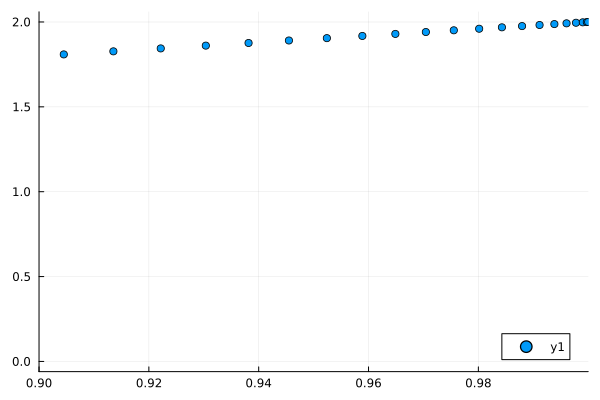

In [272]:

#plot(x,y)

scatter(xnew[4:L-3],auxnew[4:L-3],xlim=[0.9,1])

#plot(x[4:L-3],aux[4:L-3])

In [164]:
auxnew[L-3]

2.0000000000015